# Credit Card Default Prediction

## Install and import the required libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

## Data Processing

In [17]:
df = pd.read_csv('./credit-card-default-clients.csv')
df = df.drop(columns=['ID'])
df.rename(columns={'default payment next month': 'Default'}, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [55]:
y = df.iloc[:,-1]
X = df.iloc[:,:-1]
X_norm = StandardScaler().fit(X).transform(X)

Check whether the data is balanced.

In [57]:
print(y.value_counts(normalize=True))

Default
0    0.7788
1    0.2212
Name: proportion, dtype: float64


Since the data is imbalanced, we use stratified sampling.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4, stratify=y)

## Logistic Regression

In [65]:
LR = LogisticRegression()
LRmodel = LR.fit(X_train,y_train)

In [71]:
y_hat_cl = LR.predict(X_test)
y_hat_prob = LR.predict_proba(X_test)

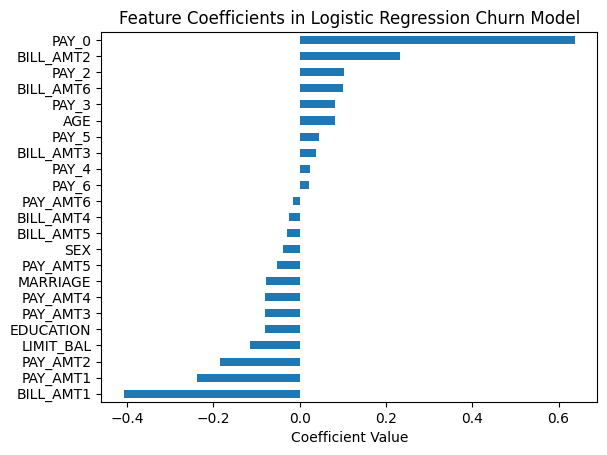

In [70]:
coefficients = pd.Series(LRmodel.coef_[0], index=df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

## Evaluation

In [79]:
#log_loss(y_test, y_hat_prob)
y_prob = y_hat_prob[:, 1]
score = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_hat_cl)
print(f"ROC AUC: {score:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_hat_cl))

ROC AUC: 0.7122
Accuracy: 0.8062

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89      4673
           1       0.70      0.22      0.33      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.61      6000
weighted avg       0.79      0.81      0.76      6000



In [83]:
cm = confusion_matrix(y_test, y_hat_cl)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[4546  127]
 [1036  291]]
